After a bad first attempt at creating an image classification model, I trained a model on the MNIST database of handwritten digits this time around. This post is actually a jupyter notebook, which you can find [here](https://github.com/akshathkothari/akshathkothari.github.io/tree/master/_jupyter).

## The Project

In [1]:
from fastai.vision import *

In [2]:
path = Path('/home/jupyter/projects/data/mnist-handwritten-digits')

There was no need of downloading the images this time - I used images provided at the [fastai website](https://course.fast.ai/datasets) from the [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist/).

### View Data

In [3]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train="training", test="testing", valid_pct=0.2, ds_tfms=get_transforms(do_flip=False), size=24).normalize(mnist_stats)

In [4]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 10, 56000, 14000)

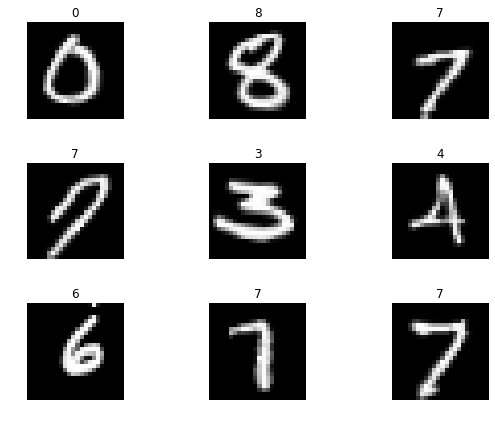

In [5]:
data.show_batch(rows = 3, figsize=(8,6))

### Train Model

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.629089,0.367164,0.114357,00:53
1,0.281252,0.141664,0.042786,00:51
2,0.206387,0.094406,0.027857,00:52
3,0.154552,0.086221,0.026929,00:51


In [8]:
learn.save('stage-1')

### Interpretation

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

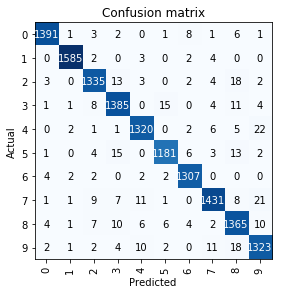

In [10]:
interp.plot_confusion_matrix()

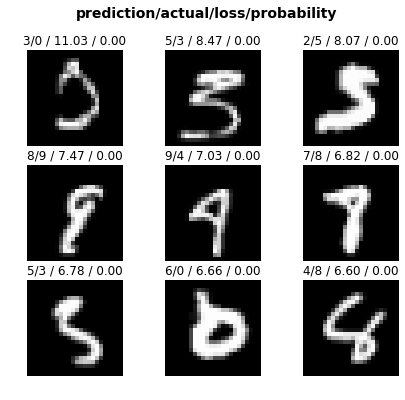

In [11]:
interp.plot_top_losses(9, figsize=(7, 6), heatmap=False)

### Fine Tuning

In [12]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.056507,0.020995,0.006500,01:02


In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


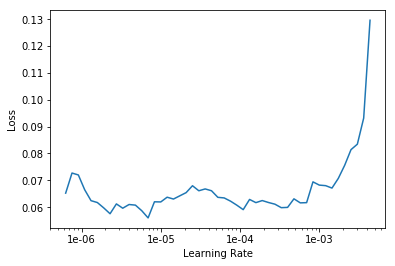

In [14]:
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.051320,0.019155,0.005857,01:03
1,0.045109,0.017994,0.005571,01:02


In [16]:
learn.save('stage-2')